# Finding zeros for univariate functions with Bisection, Newton and scipy.optimizaton 

from
Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

Chapter 5: Equation solving

Optimization - NonLinear Univariate Functions

Bisection, Newton, Optimization Methods

In [2]:
from scipy import linalg as la

In [3]:
from scipy import optimize as op

In [4]:
import sympy

In [5]:
sympy.init_printing()

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [8]:
from __future__ import division

## Nonlinear equations
Univariate case: the best way is with scipy.optimize

### Univariate. These cases are Find the zero of a non linear function, f(x) = 0

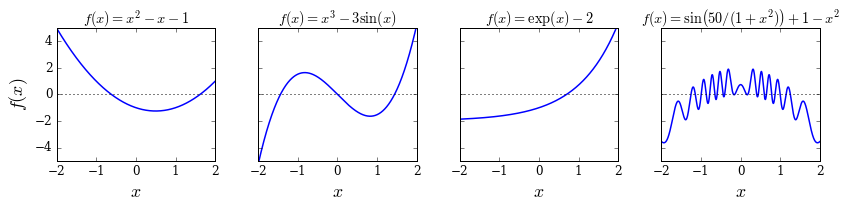

In [14]:
x = np.linspace(-2, 2, 1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
#fig.tight_layout()
#fig.savefig('pdf_files/ch5-nonlinear-plot-equations.pdf')

### Symbolic

In [10]:
import sympy as s

In [11]:
x, a, b, c = sympy.symbols("x, a, b, c")

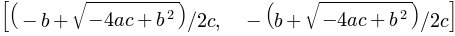

In [12]:
sympy.solve(a + b*x + c*x**2, x)

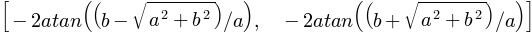

In [13]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

In [ ]:
# no analytic solution in this case. we need to proceed numerically
# sympy.solve(sympy.sin(x)-x, x)

### Bisection method

0.6875
-0.011262530417708083


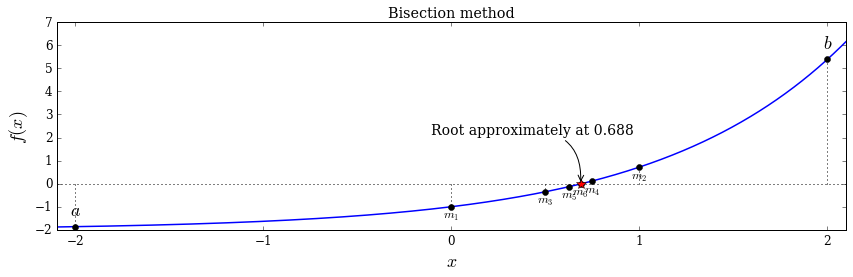

In [16]:
# define a function, desired tolerance and starting interval [a, b]
# the idea is that 
# f(x) = 2 or f(x) - 2 = 0
# in the interval of x in [-2, 2]

f    = lambda x: np.exp(x) - 2
tol  = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot([a, a], [0, fa], color='k', ls=':')
ax.plot(b, fb, 'ko')
ax.plot([b, b], [0, fb], color='k', ls=':')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)
n = 1
while b - a > tol:
    m  = a + (b - a)/2
    fm = f(m)
    ax.plot([m, m], [0, fm], color='k', ls=':')
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1 
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))
ax.set_title("Bisection method")
#fig.tight_layout()
#fig.savefig('pdf_files/ch5-nonlinear-bisection.pdf')

print (m)
print (f(m))

0.6931894022505122
8.444516382999367e-05
2.00008444516383
2.00008444516383


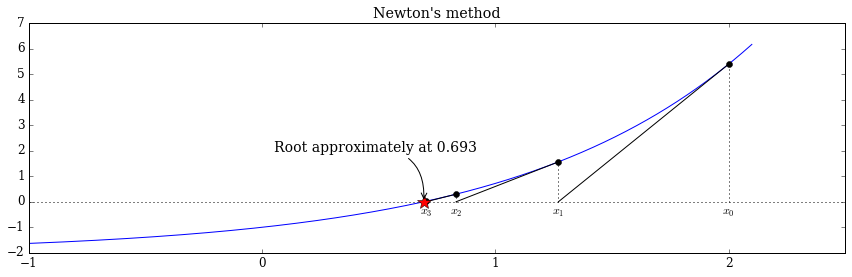

In [17]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk   = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f    = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp   = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x, 1), 'numpy')(x)
fpp  = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x, 2), 'numpy')(x)
x = np.linspace(-1, 2.1, 1000)
# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    xk = xk_new
    n += 1
ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))
ax.set_title("Newton's method")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()
fig.savefig('pdf_files/ch5-nonlinear-newton.pdf')
print (xk)
print (f(xk))
print (fp(xk))
print (fpp(xk))

## Optimization Methods

In [18]:
op.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [19]:
op.newton(lambda x: np.exp(x) - 2, 2)

In [20]:
x_root_guess = 2

In [21]:
f = lambda x: np.exp(x) - 2

In [22]:
fprime = lambda x: np.exp(x)

In [23]:
op.newton(f, x_root_guess)

In [24]:
op.newton(f, x_root_guess, fprime=fprime)

In [25]:
# this is considered as the preferred all-around root finder funtion in python SciPy
op.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [26]:
op.brenth(lambda x: np.exp(x) - 2, -2, 2)

In [27]:
op.ridder(lambda x: np.exp(x) - 2, -2, 2)